In [1]:
from threshold import *
import matplotlib.pyplot as plt

In [2]:
# Thresholds to search over
thresholds = [-8, -5, -3, -2, -1, 0, 1, 2, 3, 5, 8]

# 3 trials, 500 random samples each
result = eval_thresholds(probe_dir = "fine_tuned_epoch_1/fine_tuned_probes/",
                         model_prefix = "twmkn9/albert-base-v2-squad2",
                         n = 500,
                         trials = 3,
                         thresholds = thresholds)

100%|██████████| 16/16 [00:01<00:00,  8.15it/s]


Loading probes


Evaluating:   0%|          | 0/134 [00:00<?, ?it/s]

Trial: 0


Evaluating:   0%|          | 0/132 [00:00<?, ?it/s]

Trial: 1


Evaluating:   0%|          | 0/131 [00:00<?, ?it/s]

Trial: 2


Evaluating: 100%|██████████| 131/131 [11:44<00:00,  5.38s/it]


In [3]:
def plot_metric(result, layers, metric = "f1"):
    
    if metric == "exact":
        idx = 0
    elif metric == "f1":
        idx = 1
    elif metric == "exact_no_ans":
        idx = 2
    elif metric == "f1_no_ans":
        idx = 3
    elif metric == "exact_has_ans":
        idx = 4
    elif metric == "f1_has_ans":
        idx = 5
    
    thresholds = list(result.keys())
    
    plt.figure(figsize=(20,10))
    
    for layer in range(layers):
        f1s = []
        for thresh in thresholds:
            f1 = result[thresh][layer][idx]
            f1s.append(f1)
        plt.plot(thresholds, f1s, label = str(layer + 1))
      
    plt.plot(thresholds, f1s, label = layer)
    plt.xlabel("Threshold")
    plt.ylabel(metric)
    plt.title(metric + " vs. threshold for layer " + str(layer))
    plt.legend()

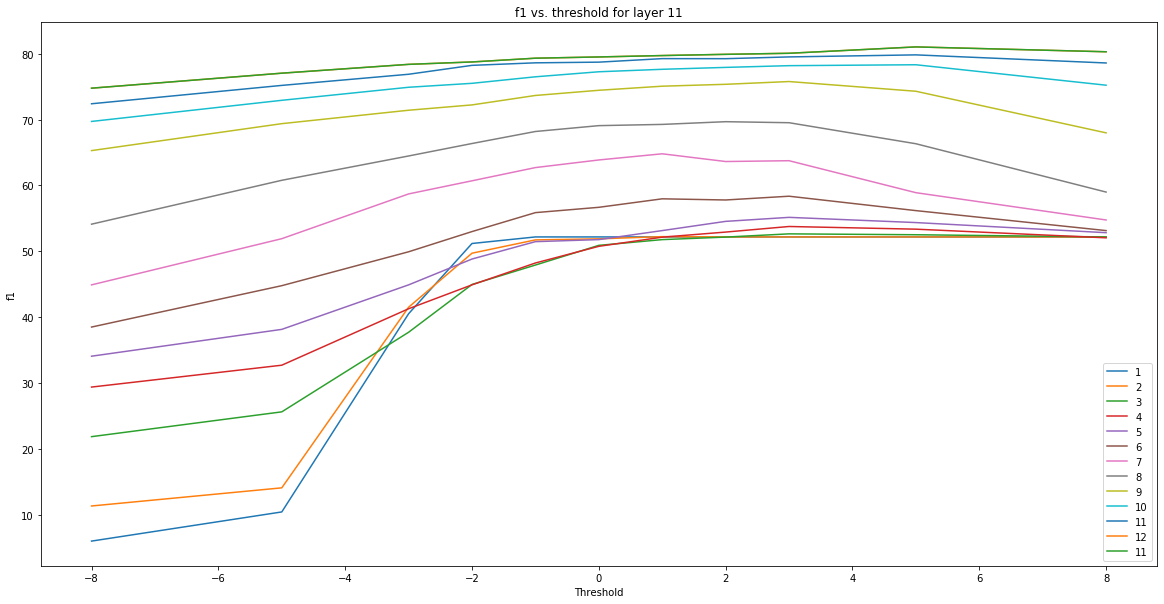

In [4]:
plot_metric(result, 12)

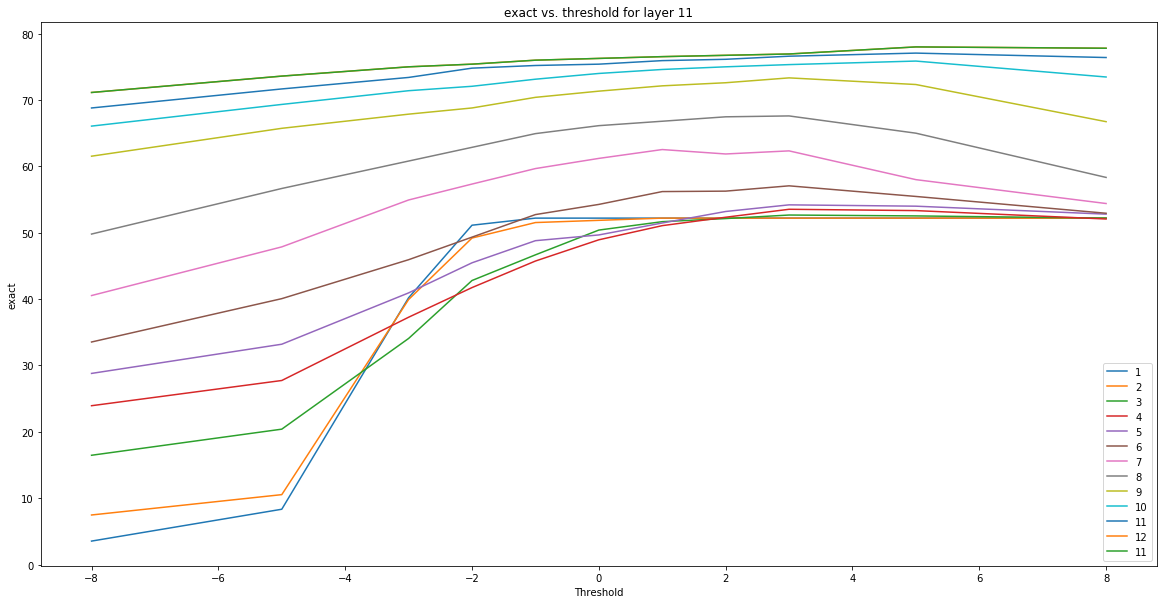

In [5]:
plot_metric(result, 12, "exact")